In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
!pip install wordcloud
from wordcloud import WordCloud
!pip install nltk
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\somya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [38]:
dep_tweets=pd.read_csv('depressive_tweets.csv')
pos_tweets=pd.read_csv('positive_tweets.csv')

In [39]:
dep_tweets

,Label,Tweet Id,Username,Text,Year,Month
0,1,1245138728135385089,trippyhippie99,For someone who struggles with anxiety this pa...,2020,Mar
1,1,1245116161223778306,KTABTV,Report: 31% of people sleeping less due to COV...,2020,Mar
2,1,1245116161634820096,bigcountryhome,Report: 31% of people sleeping less due to COV...,2020,Mar
3,1,1245116168224022532,futureof_school,Anxiety isn't an unusual feeling or reaction t...,2020,Mar
4,1,1245116301778927616,CaponeTeaches,"@hauber_alex For me, last week it was anxiety....",2020,Mar
...,...,...,...,...,...,...
8277,1,1421558872012165120,TwoBladeBae,"I know that even still, with all this, I’m inc...",2021,Jul
8278,1,1421558918367649797,dr_ray_hodl,@dosjrcoin @Bradorek @olya_borderless U meant ...,2021,Jul
8279,1,1421559688064294914,TSJ_Letlapa,I always have anxiety when I have to do an onl...,2021,Jul
8280,1,1421555934862663684,wgbarnes615,"""Zinc deficiency linked to poor COVID-19 outco...",2021,Jul


In [40]:
pos_tweets

,Label,Tweet Id,Username,Text
0,0,1573719707,tranquilized09,@ArielChloe well another sunny day i could get...
1,0,1989371862,Aryskarlet,@lilyroseallen Think that the singer looks lik...
2,0,1975122319,karenclaunch,So joyful right now! excellent sermon today ...
3,0,2182197369,nickymatthews,relaxing and enjoying being clean after a grea...
4,0,1693269239,vaov,@MattBennettMB yo hair in that clip!
...,...,...,...,...
7871,0,1696043380,Irv25,Good Morning twitters!!! I am soooo tired...I ...
7872,0,2050960500,Smalltalkwitht,@JoyceSchneider1 It's so true... I did!
7873,0,1880015787,jaySics,i want to go see Terminator again. goodnight
7874,0,2016680792,Mzpurrfection,@popnbulletz1 SEE U 2 whats new


Building a contractions dictionary to expand these abbreviations

In [41]:
contractions_dict = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [42]:
import regex as re
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(s, contractions_dict=contractions_dict):
     def replace(match):
        return contractions_dict[match.group(0)]
     return contractions_re.sub(replace, s)


In [43]:
!pip install ftfy
import ftfy

In [44]:
stop_words = set(stopwords.words("english"))

In [45]:
stop_words.update(("mon","tue","wed","thu","fri","sat","sun","sunday","monday","tuesday","thursday","friday","saturday","sunday","thurs","thur","tues"))
stop_words.update(("january","february","march","april","may","june","july","august",
              "september","october","november","december","jan","feb","mar","apr",
              "may","jun","jul","aug","sep","oct","nov","dec", "twitter", "thanking","thanks","fuck","fucking", "might","like"))

In [46]:
def clean_tweets(tweets):
    cleaned_tweets = []
    for tweet in tweets:
            tweet = str(tweet)
        # if url links, then don't append to avoid news articles, etc.
        # Check tweet length, save those > 6 (length of word "lonely")
            tweet = tweet.lower()

       
            tweet = re.sub(r"http\S+", "", tweet)
            tweet = re.sub(r'www.+', "", tweet)
            tweet = re.sub('[0-9]+', '', tweet)

            #remove hashtags, @mention, emoji and image URLs
            tweet = ' '.join(re.sub("(@[a-z0-9]+)|(\#[a-z0-9]+)|(<Emoji:.*>)|(pic\.twitter\.com\/.*)", " ", tweet).split())
            # Remove HTML special entities (e.g. &amp;)
            tweet = re.sub(r'\&\w*;', '', tweet)
            #Convert @username to AT_USER
            tweet = re.sub('@[^\s]+','',tweet)
            # Remove tickers
            tweet = re.sub(r'\$\w*', '', tweet)
            # Remove hyperlinks
            tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
            # Remove words with 2 or fewer letters
            tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
            # Remove whitespace (including new line characters)
            tweet = re.sub(r'\s\s+', ' ', tweet)
            # Remove single space remaining at the front of the tweet.
            tweet = tweet.lstrip(' ') 
            # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
            tweet = ''.join(c for c in tweet if c <= '\uFFFF')
            #fix weirdly encoded texts
            tweet = ftfy.fix_text(tweet)
            #expand contraction
            tweet = expand_contractions(tweet)
            #remove punctuation
            tweet = ' '.join(re.sub("([^0-9A-Za-z \t])", " ", tweet).split())
            
            
            # Tokenize and join to remove unneccessary white spaces
            words = [x for x  in tok.tokenize(tweet) if len(x) > 1]
            #return (" ".join(words)).strip()

                    
    
            word_tokens = nltk.word_tokenize(tweet) 
            filtered_sentence = [w for w in word_tokens if not w in stop_words]
            tweet = ' '.join(filtered_sentence)

            #stemming words
#             tweet = PorterStemmer().stem(tweet)
            
            cleaned_tweets.append(tweet)

    return cleaned_tweets

In [47]:
#Applying the preprocessing clean_text function to every element in the depressive tweets and random tweets data.
depressive_tweets_arr = [x for x in dep_tweets['Text']]
positive_tweets_arr = [x for x in pos_tweets['Text']]
dep_tweets['clean_text'] = clean_tweets(depressive_tweets_arr)
pos_tweets['clean_text'] = clean_tweets(positive_tweets_arr)

In [48]:
pos_tweets

,Label,Tweet Id,Username,Text,clean_text
0,0,1573719707,tranquilized09,@ArielChloe well another sunny day i could get...,well another sunny day could get use time work...
1,0,1989371862,Aryskarlet,@lilyroseallen Think that the singer looks lik...,think singer looks sean astin goonies voice st...
2,0,1975122319,karenclaunch,So joyful right now! excellent sermon today ...,joyful right excellent sermon today excellent ...
3,0,2182197369,nickymatthews,relaxing and enjoying being clean after a grea...,relaxing enjoying clean great days mans
4,0,1693269239,vaov,@MattBennettMB yo hair in that clip!,hair clip
...,...,...,...,...,...
7871,0,1696043380,Irv25,Good Morning twitters!!! I am soooo tired...I ...,good morning twitters soooo tired really need ...
7872,0,2050960500,Smalltalkwitht,@JoyceSchneider1 It's so true... I did!,true
7873,0,1880015787,jaySics,i want to go see Terminator again. goodnight,want see terminator goodnight
7874,0,2016680792,Mzpurrfection,@popnbulletz1 SEE U 2 whats new,see whats new


In [49]:
dep_tweets

,Label,Tweet Id,Username,Text,Year,Month,clean_text
0,1,1245138728135385089,trippyhippie99,For someone who struggles with anxiety this pa...,2020,Mar,someone struggles anxiety pandemic terrifying ...
1,1,1245116161223778306,KTABTV,Report: 31% of people sleeping less due to COV...,2020,Mar,report people sleeping less due covid related ...
2,1,1245116161634820096,bigcountryhome,Report: 31% of people sleeping less due to COV...,2020,Mar,report people sleeping less due covid related ...
3,1,1245116168224022532,futureof_school,Anxiety isn't an unusual feeling or reaction t...,2020,Mar,anxiety unusual feeling reaction parents stude...
4,1,1245116301778927616,CaponeTeaches,"@hauber_alex For me, last week it was anxiety....",2020,Mar,alex last week anxiety news first friend dying...
...,...,...,...,...,...,...,...
8277,1,1421558872012165120,TwoBladeBae,"I know that even still, with all this, I’m inc...",2021,Jul,know even still incredibly lucky made far pand...
8278,1,1421558918367649797,dr_ray_hodl,@dosjrcoin @Bradorek @olya_borderless U meant ...,2021,Jul,borderless meant people kid dead becoz depress...
8279,1,1421559688064294914,TSJ_Letlapa,I always have anxiety when I have to do an onl...,2021,Jul,always anxiety online live sermon lot wrong be...
8280,1,1421555934862663684,wgbarnes615,"""Zinc deficiency linked to poor COVID-19 outco...",2021,Jul,zinc deficiency linked poor covid outcomes tit...


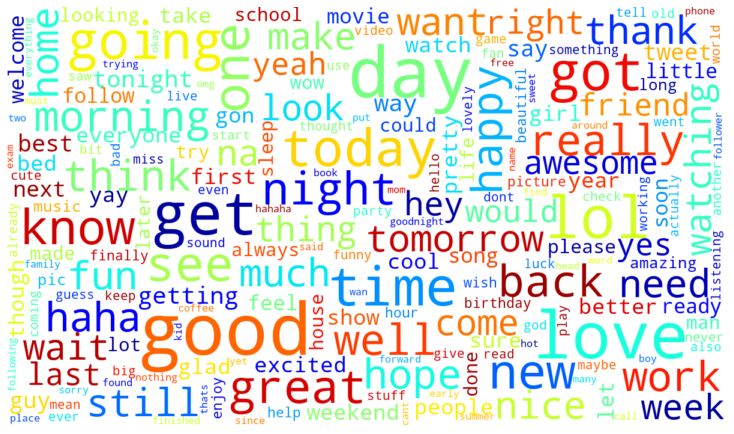

In [50]:
all_words = ' '.join([text for text in pos_tweets['clean_text']])

wordcloud = WordCloud(background_color='white', colormap='jet',width = 1200, height = 700,random_state=1, stopwords=stop_words, collocations=False,max_font_size=120).generate(all_words)
fig = plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

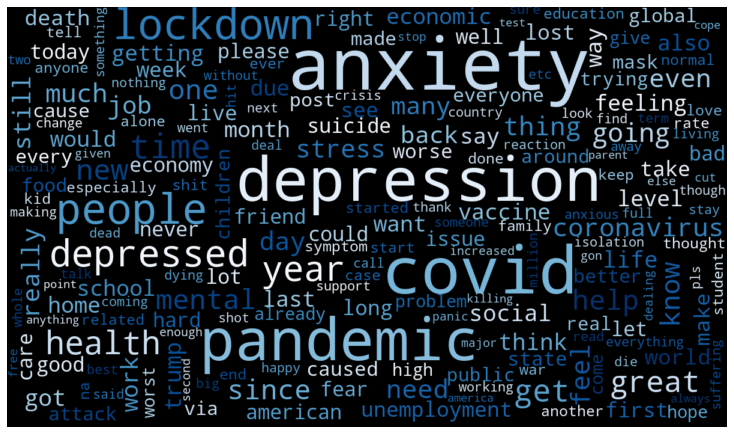

In [51]:
all_words = ' '.join([text for text in dep_tweets['clean_text']])

wordcloud = WordCloud(colormap='Blues',width = 1200, height = 700,random_state=1, stopwords=stop_words, collocations=False,max_font_size=120).generate(all_words)
fig = plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [53]:
words_in_positive_tweet = [tweet.lower().split() for tweet in pos_tweets['clean_text']]
words_in_positive_tweet[:2]

[['well',
  'another',
  'sunny',
  'day',
  'could',
  'get',
  'use',
  'time',
  'work',
  'maybe',
  'wont',
  'back',
  'wont',
  'miss'],
 ['think',
  'singer',
  'looks',
  'sean',
  'astin',
  'goonies',
  'voice',
  'style',
  'brandon',
  'flowers',
  'greg',
  'alexander']]

In [54]:
import collections
import itertools
from itertools import chain

In [55]:
# List of all words across tweets
all_words_pos = list(itertools.chain(*words_in_positive_tweet))

# Create counter
count_words_pos = collections.Counter(all_words_pos)

count_words_pos.most_common(15)

[('good', 616),
 ('day', 496),
 ('love', 469),
 ('lol', 400),
 ('get', 384),
 ('got', 331),
 ('going', 320),
 ('today', 308),
 ('time', 299),
 ('see', 279),
 ('one', 276),
 ('know', 260),
 ('great', 253),
 ('new', 253),
 ('night', 239)]

In [56]:
clean_tweets_pos = pd.DataFrame(count_words_pos.most_common(15),
                             columns=['words', 'count'])

clean_tweets_pos.head()

,words,count
0,good,616
1,day,496
2,love,469
3,lol,400
4,get,384


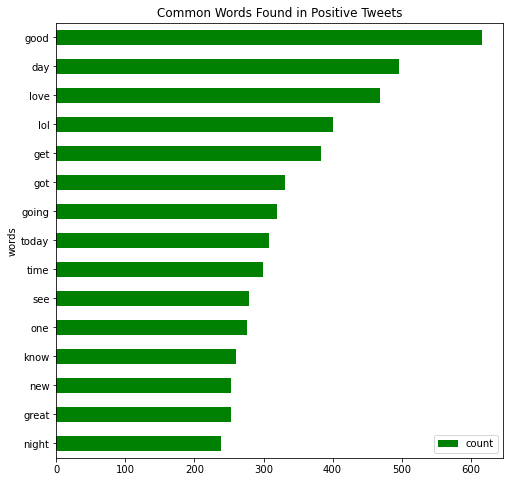

In [57]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_pos.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Positive Tweets")

plt.show()

In [58]:
dep_tweets['clean_text'][0].split()

['someone',
 'struggles',
 'anxiety',
 'pandemic',
 'terrifying',
 'thing',
 'ever',
 'fear',
 'worry',
 'feel',
 'suffocating']

In [59]:
words_in_depressive_tweet = [tweet.lower().split() for tweet in dep_tweets['clean_text']]
words_in_depressive_tweet[:2]

[['someone',
  'struggles',
  'anxiety',
  'pandemic',
  'terrifying',
  'thing',
  'ever',
  'fear',
  'worry',
  'feel',
  'suffocating'],
 ['report',
  'people',
  'sleeping',
  'less',
  'due',
  'covid',
  'related',
  'anxiety']]

In [60]:
# List of all words across tweets
all_words_dep = list(itertools.chain(*words_in_depressive_tweet))

# Create counter
count_words_dep = collections.Counter(all_words_dep)

count_words_dep.most_common(15)

[('anxiety', 4565),
 ('covid', 3724),
 ('depression', 3198),
 ('pandemic', 2928),
 ('people', 1252),
 ('lockdown', 1189),
 ('depressed', 989),
 ('health', 747),
 ('year', 666),
 ('great', 637),
 ('get', 626),
 ('time', 612),
 ('mental', 552),
 ('since', 543),
 ('help', 500)]

In [61]:
clean_tweets_dep = pd.DataFrame(count_words_dep.most_common(15),
                             columns=['words', 'count'])

clean_tweets_dep.head()

,words,count
0,anxiety,4565
1,covid,3724
2,depression,3198
3,pandemic,2928
4,people,1252


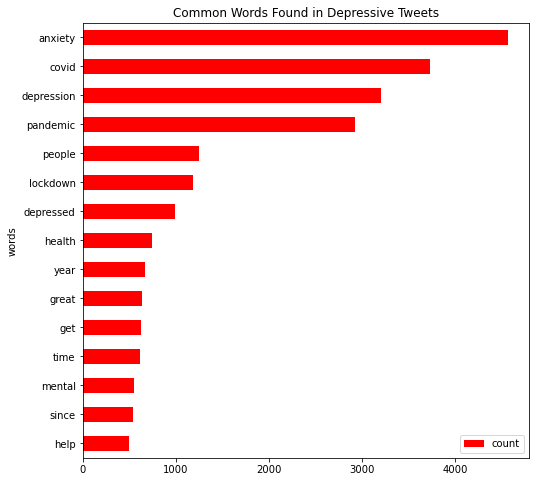

In [62]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_dep.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("Common Words Found in Depressive Tweets")

plt.show()

In [63]:
dep_tweets.drop(columns=['Year','Month'], inplace=True)

In [64]:
df=pd.concat([dep_tweets, pos_tweets],ignore_index = True)

In [65]:
df

,Label,Tweet Id,Username,Text,clean_text
0,1,1245138728135385089,trippyhippie99,For someone who struggles with anxiety this pa...,someone struggles anxiety pandemic terrifying ...
1,1,1245116161223778306,KTABTV,Report: 31% of people sleeping less due to COV...,report people sleeping less due covid related ...
2,1,1245116161634820096,bigcountryhome,Report: 31% of people sleeping less due to COV...,report people sleeping less due covid related ...
3,1,1245116168224022532,futureof_school,Anxiety isn't an unusual feeling or reaction t...,anxiety unusual feeling reaction parents stude...
4,1,1245116301778927616,CaponeTeaches,"@hauber_alex For me, last week it was anxiety....",alex last week anxiety news first friend dying...
...,...,...,...,...,...
16153,0,1696043380,Irv25,Good Morning twitters!!! I am soooo tired...I ...,good morning twitters soooo tired really need ...
16154,0,2050960500,Smalltalkwitht,@JoyceSchneider1 It's so true... I did!,true
16155,0,1880015787,jaySics,i want to go see Terminator again. goodnight,want see terminator goodnight
16156,0,2016680792,Mzpurrfection,@popnbulletz1 SEE U 2 whats new,see whats new


In [66]:
print (df[df['clean_text'].isnull()])

Empty DataFrame
Columns: [Label, Tweet Id, Username, Text, clean_text]
Index: []


In [67]:
df=df.dropna()
df = df.reset_index(drop=True)

In [68]:
print (df[df['clean_text'].isnull()])

Empty DataFrame
Columns: [Label, Tweet Id, Username, Text, clean_text]
Index: []


In [69]:
df.to_csv('combined_tweets.csv',index=False)